Predict คนไข้ว่าจะเป็นเบาหวานหรือไม่ โดยใช้ Keras ทำงานกับ Structured Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', names=['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', '2-Hour serum insulin', 'Body mass index','Diabetes pedigree function','Age','Class variable'])
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df['Plasma glucose concentration'].replace(0,df['Plasma glucose concentration'].mean(),inplace = True)
df['Diastolic blood pressure'].replace(0,df['Diastolic blood pressure'].mean(),inplace = True)
df['2-Hour serum insulin'].replace(0,df['2-Hour serum insulin'].mean(),inplace = True)
df['Body mass index'].replace(0,df['Body mass index'].mean(),inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Number of times pregnant'),
  Text(1, 0, 'Plasma glucose concentration'),
  Text(2, 0, 'Diastolic blood pressure'),
  Text(3, 0, 'Triceps skin fold thickness'),
  Text(4, 0, '2-Hour serum insulin'),
  Text(5, 0, 'Body mass index'),
  Text(6, 0, 'Diabetes pedigree function'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Class variable')])

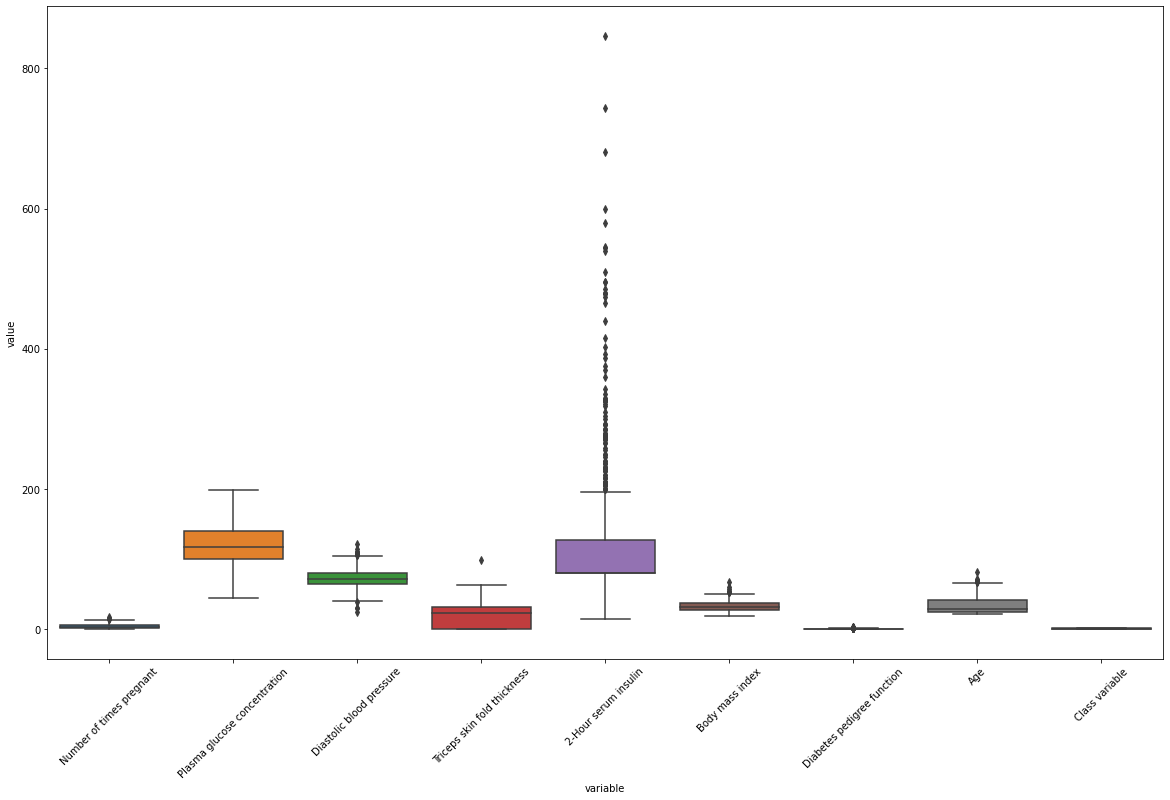

In [25]:
fig = plt.figure(figsize=[20,12])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.xticks(rotation=45)

In [26]:
data = df.values
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [27]:
x = data[:,0:8]
y = data[:,8]

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
x_scaler = scaler.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=20)

In [32]:
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5, random_state=20)

In [98]:
model = keras.models.Sequential([keras.layers.Dense(128,activation='relu',input_shape=(8,))
                                ,keras.layers.Dense(64,activation='softmax')
                                ,keras.layers.Dense(32,activation='relu')
                                ,keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
history = model.fit(x_train,y_train,epochs=300,validation_data=(x_val,y_val))

Epoch 1/300
20/20 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.6498 - val_loss: 0.6714 - val_accuracy: 0.6623
Epoch 2/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6498 - val_loss: 0.6602 - val_accuracy: 0.6623
Epoch 3/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6498 - val_loss: 0.6506 - val_accuracy: 0.6623
Epoch 4/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6498 - val_loss: 0.6449 - val_accuracy: 0.6623
Epoch 5/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6498 - val_loss: 0.6417 - val_accuracy: 0.6623
Epoch 6/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6498 - val_loss: 0.6379 - val_accuracy: 0.6623
Epoch 7/300
20/20 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.6498 - val_loss: 0.6290 - val_accuracy: 0.6623
Epoch 8/300
2

Epoch 59/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7720 - val_loss: 0.4864 - val_accuracy: 0.7532
Epoch 60/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7769 - val_loss: 0.4816 - val_accuracy: 0.7662
Epoch 61/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7785 - val_loss: 0.4847 - val_accuracy: 0.7532
Epoch 62/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7866 - val_loss: 0.4793 - val_accuracy: 0.7662
Epoch 63/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7818 - val_loss: 0.4818 - val_accuracy: 0.7532
Epoch 64/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7818 - val_loss: 0.4788 - val_accuracy: 0.7792
Epoch 65/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7866 - val_loss: 0.4888 - val_accuracy: 0.7532
Epoch 

20/20 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.7932 - val_loss: 0.4708 - val_accuracy: 0.7922
Epoch 117/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7932 - val_loss: 0.5105 - val_accuracy: 0.7013
Epoch 118/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8062 - val_loss: 0.4722 - val_accuracy: 0.7792
Epoch 119/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7932 - val_loss: 0.4707 - val_accuracy: 0.7792
Epoch 120/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.7932 - val_loss: 0.4739 - val_accuracy: 0.7792
Epoch 121/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.7980 - val_loss: 0.4764 - val_accuracy: 0.7792
Epoch 122/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.7964 - val_loss: 0.4718 - val_accuracy: 0.7662
Epoch 123/300

20/20 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8111 - val_loss: 0.4923 - val_accuracy: 0.7662
Epoch 174/300
20/20 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8013 - val_loss: 0.4881 - val_accuracy: 0.7662
Epoch 175/300
20/20 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8062 - val_loss: 0.4847 - val_accuracy: 0.7792
Epoch 176/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8127 - val_loss: 0.4860 - val_accuracy: 0.7532
Epoch 177/300
20/20 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8094 - val_loss: 0.4903 - val_accuracy: 0.7662
Epoch 178/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8094 - val_loss: 0.4959 - val_accuracy: 0.7403
Epoch 179/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8078 - val_loss: 0.4859 - val_accuracy: 0.7922
Epoch 180/300

20/20 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8192 - val_loss: 0.5168 - val_accuracy: 0.7143
Epoch 231/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8143 - val_loss: 0.5422 - val_accuracy: 0.7143
Epoch 232/300
20/20 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8160 - val_loss: 0.5205 - val_accuracy: 0.7532
Epoch 233/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8241 - val_loss: 0.5388 - val_accuracy: 0.6753
Epoch 234/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8143 - val_loss: 0.5301 - val_accuracy: 0.7013
Epoch 235/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8225 - val_loss: 0.5346 - val_accuracy: 0.7013
Epoch 236/300
20/20 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8322 - val_loss: 0.5178 - val_accuracy: 0.7273
Epoch 237/300

20/20 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8306 - val_loss: 0.5488 - val_accuracy: 0.7532
Epoch 288/300
20/20 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8339 - val_loss: 0.5593 - val_accuracy: 0.7403
Epoch 289/300
20/20 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8371 - val_loss: 0.5604 - val_accuracy: 0.7013
Epoch 290/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8290 - val_loss: 0.5481 - val_accuracy: 0.7273
Epoch 291/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8322 - val_loss: 0.5490 - val_accuracy: 0.7403
Epoch 292/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8339 - val_loss: 0.5501 - val_accuracy: 0.7403
Epoch 293/300
20/20 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8339 - val_loss: 0.5504 - val_accuracy: 0.7662
Epoch 294/300

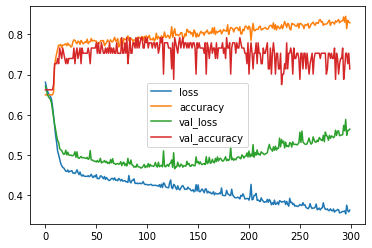

In [100]:
pd.DataFrame(history.history).plot();

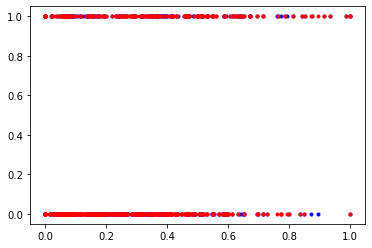

In [101]:
predictions = model.predict_classes(x_test)
plt.plot(x_test,y_test,'.b')
plt.plot(x_test,predictions,'.r')

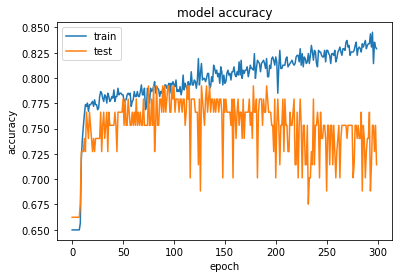

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

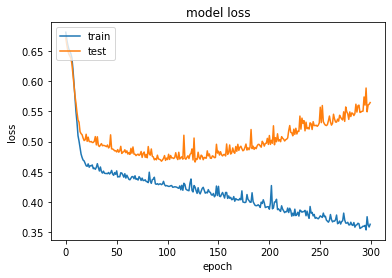

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()